In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
train_images = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_train_colored.npy')

In [ ]:
train_images.shape

(60000, 28, 28, 3)

In [ ]:
train_images = torch.tensor(train_images).permute(0,3,1,2).float()/255.0

In [ ]:
train_images.shape

torch.Size([60000, 3, 28, 28])

In [ ]:
train_images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
        

In [ ]:
train_imagesColoredBg = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_train95Bg.npy')

In [ ]:
train_imagesColoredBg.shape

(60000, 28, 28, 3)

In [ ]:
train_imagesColoredBg = torch.tensor(train_imagesColoredBg).permute(0,3,1,2).float()/255.0

In [ ]:
testImagesBgInverted = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_testImagesBgInverted.npy')

In [ ]:
testImagesBgInverted = torch.tensor(testImagesBgInverted).permute(0,3,1,2).float()/255.0

In [ ]:
train_labels = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_trainLabels_colored.npy')

In [ ]:
train_labels.shape

(60000,)

In [ ]:
train_labels = torch.tensor(train_labels).long()

In [ ]:
train_labels.shape

torch.Size([60000])

In [ ]:
test_images = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_test_colored.npy')
test_imagesInverted = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_test_colored-inverted.npy')

In [ ]:
test_labels = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_testLabels_colored.npy')

In [ ]:
test_images = torch.tensor(test_images).permute(0,3,1,2).float()/255.0
test_imagesInverted = torch.tensor(test_imagesInverted).permute(0,3,1,2).float()/255.0

In [ ]:
test_labels = torch.tensor(test_labels).long()

In [ ]:
test_images.shape
test_imagesInverted.shape

torch.Size([10000, 3, 28, 28])

In [ ]:
test_labels.shape

torch.Size([10000])

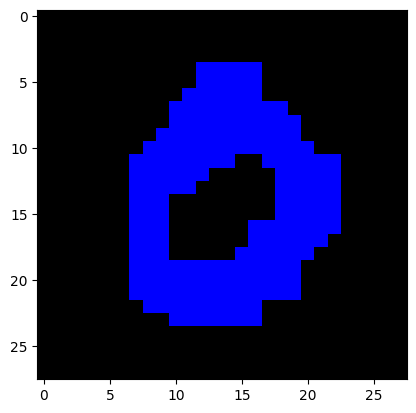

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
for i,label in enumerate(test_labels):
  if label == 0:
    index0 = i
    break
Img0 = test_imagesInverted[index0].permute(1,2,0).cpu().numpy()
plt.imshow(Img0)


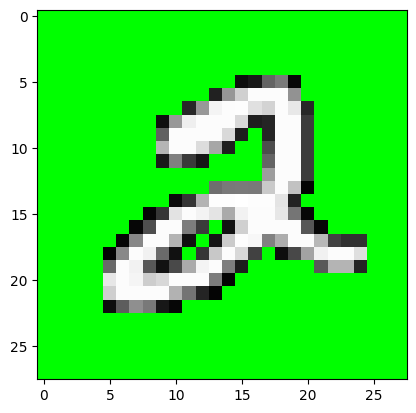

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
cnt = 0
for i,label in enumerate(train_labels):
  if label == 7:
    index0 = i
    break
Img0BG = train_imagesColoredBg[index0].permute(1,2,0).cpu().numpy()
plt.imshow(Img0BG)


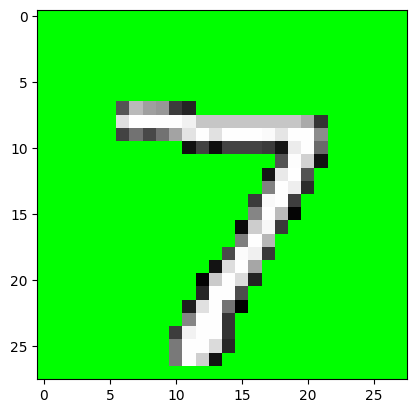

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
cnt = 0
for i,label in enumerate(test_labels):
  if label == 7:
    index0 = i
    break
Img0BG = testImagesBgInverted[index0].permute(1,2,0).cpu().numpy()
plt.imshow(Img0BG)


In [ ]:

Img0.shape

(28, 28, 3)

In [ ]:
Img0BG.shape

(28, 28, 3)

In [ ]:
Img0 = torch.tensor(Img0).unsqueeze(0)


In [ ]:
Img0BG = torch.tensor(Img0BG).unsqueeze(0)

In [ ]:
Img0BG.shape


torch.Size([1, 28, 28, 3])

In [ ]:
Img0 = torch.tensor(Img0, requires_grad=True).permute(0,3,1,2)
Img0.shape

/tmp/ipython-input-2593178605.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Img0 = torch.tensor(Img0, requires_grad=True).permute(0,3,1,2)


torch.Size([1, 3, 28, 28])

In [ ]:
Img0BG = torch.tensor(Img0BG, requires_grad=True).permute(0,3,1,2)
Img0BG.shape

/tmp/ipython-input-1051478583.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Img0BG = torch.tensor(Img0BG, requires_grad=True).permute(0,3,1,2)


torch.Size([1, 3, 28, 28])

In [ ]:
storeGradients = {}

In [ ]:
def backwardHook(model , input, outputGradients):
  storeGradients['conv2Layer'] = outputGradients
def forwardHook(target,input,output):
  storeGradients['CONV2outputs'] = output

In [ ]:
def backwardHookBG(model , input, outputGradients):
  storeGradients['conv2LayerBG'] = outputGradients
def forwardHookBG(target,input,output):
  storeGradients['CONV2outputsBG'] = output

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Layer 1: 3 input channels (RGB), 16 filters, 3x3 kernel
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        # Layer 2: 16 input channels, 32 filters, 3x3 kernel
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        # Max pooling to shrink the image size
        self.pool = nn.MaxPool2d(2, 2)

        # After two 2x2 pools, a 28x28 image becomes 7x7
        # 32 filters * 7 * 7 = 1568 features
        self.fc = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # 28x28 -> 14x14
        x = self.pool(F.relu(self.conv2(x))) # 14x14 -> 7x7
        x = torch.flatten(x, 1)              # Flatten to 1D
        x = self.fc(x)                       # Final 10 scores
        return x



In [ ]:
model_cnn = SimpleCNN().to(device)
model_cnn.load_state_dict(torch.load('/content/drive/MyDrive/3-simpleCNNmodelSaved.pth',map_location=device))
model_cnn.eval()

In [ ]:
CameraAtLayer2 = model_cnn.conv2.register_backward_hook(backwardHook)
Layer2OutputCamera = model_cnn.conv2.register_forward_hook(forwardHook)

In [ ]:
simple_modelBG = SimpleCNN().to(device)
simple_modelBG.load_state_dict(torch.load('/content/drive/MyDrive/Resnet18BGmodelSaved.pth',map_location=device))  #filesSwappedWhileSaving:>
# simple_modelBG.eval()

In [ ]:
CameraAtLayer2BG = simple_modelBG.conv2.register_backward_hook(backwardHookBG)
Layer2OutputCameraBG = simple_modelBG.conv2.register_forward_hook(forwardHookBG)

In [ ]:
output = model_cnn(Img0)
predicted = torch.argmax(output,dim=1)
loss = output[0,predicted.item()] #loss taken as score to reason about the score
loss.backward()
CameraAtLayer2.remove()
Layer2OutputCamera.remove()
output.shape

torch.Size([1, 10])

In [ ]:
outputBG = simple_modelBG(Img0BG.to(device))
predictedBG = torch.argmax(outputBG,dim=1)
loss = outputBG[0,predictedBG.item()] #loss taken as score to reason about the score
loss.backward()
CameraAtLayer2BG.remove()
Layer2OutputCameraBG.remove()
outputBG.shape

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1866: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


torch.Size([1, 10])

In [ ]:
predicted

tensor([1])

In [ ]:
predictedBG

tensor([2], device='cuda:0')

In [ ]:
output

tensor([[  0.8646,   5.2072, -11.9747,  -9.0425,  -5.0383,  -1.9089, -10.9012,
          -0.6929, -17.3032,  -5.2982]], grad_fn=<AddmmBackward0>)

In [ ]:
outputBG

tensor([[ -8.1752, -45.4206,  15.1471, -36.2500, -45.8017,  -2.1134, -25.1963,
          12.3631, -23.7340,   3.0161]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
GradientsWrtOutput = storeGradients['conv2Layer']


In [ ]:
GradientsWrtOutputBG = storeGradients['conv2LayerBG']


In [ ]:
GradientsWrtOutput[0].shape

torch.Size([1, 32, 14, 14])

In [ ]:
GradientsWrtOutputBG[0].shape

torch.Size([1, 32, 14, 14])

In [ ]:
GradientsWrtOutput

(tensor([[[[0.0000, 0.0457, 0.0272,  ..., 0.0000, 0.0532, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0546, 0.0000,  ..., 0.0000, 0.0836, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0507, 0.0000],
           [0.0000, 0.0162, 0.0613,  ..., 0.0032, 0.0302, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0365, 0.0245,  ..., 0.0000, 0.0279, 0.0000],
           [0.0000, 0.05

In [ ]:
GradientsWrtOutputBG

(tensor([[[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           ...,
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0039,  0.0000,  ...,  0.0000,  0.0000, -0.0024]],
 
          [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           ...,
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000, -0.0275]],
 
          [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 

In [ ]:
ChannelWeightConv2 = torch.zeros(32)

In [ ]:
ChannelWeightConv2BG = torch.zeros(32)

In [ ]:
ChannelWeightConv2

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
ChannelWeightConv2BG

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
for i in range(32):
  GrabChannel = GradientsWrtOutput[0][0,i,:,:]
  ChannelWeightConv2[i] = (GrabChannel.sum())/196

In [ ]:
for i in range(32):
  GrabChannelBG = GradientsWrtOutputBG[0][0,i,:,:]
  ChannelWeightConv2BG[i] = (GrabChannelBG.sum())/196

In [ ]:
ChannelWeightConv2

tensor([ 2.6226e-03,  0.0000e+00,  8.8562e-03,  0.0000e+00,  1.1559e-02,
        -2.1747e-03, -1.7255e-03, -2.8969e-03,  5.2620e-03, -3.3699e-04,
        -2.7992e-04,  1.7648e-04,  0.0000e+00,  2.2938e-03,  0.0000e+00,
        -4.6818e-05,  3.9415e-03,  0.0000e+00, -4.1053e-03, -3.3846e-03,
        -1.7277e-03,  4.0982e-03,  0.0000e+00,  0.0000e+00, -1.2548e-03,
         1.9181e-02, -2.8851e-03,  0.0000e+00, -6.2709e-03,  0.0000e+00,
        -4.7098e-03, -7.3807e-03])

In [ ]:
ChannelWeightConv2BG

tensor([-0.0013,  0.0008, -0.0010,  0.0018,  0.0019, -0.0006,  0.0000, -0.0021,
         0.0042,  0.0000, -0.0002,  0.0095, -0.0012, -0.0020, -0.0026, -0.0009,
         0.0000,  0.0010,  0.0001, -0.0002,  0.0003,  0.0000,  0.0003, -0.0017,
         0.0007,  0.0000,  0.0000, -0.0003,  0.0000,  0.0008,  0.0134,  0.0005])

In [ ]:
GrabChannel.shape

torch.Size([14, 14])

In [ ]:
GrabChannelBG.shape

torch.Size([14, 14])

In [ ]:
ChannelWeightConv2.shape

torch.Size([32])

In [ ]:
Layer2Outputs = storeGradients['CONV2outputs']

In [ ]:
Layer2OutputsBG = storeGradients['CONV2outputsBG']

In [ ]:
Layer2Outputs.shape

torch.Size([1, 32, 14, 14])

In [ ]:
Layer2OutputsBG.shape

torch.Size([1, 32, 14, 14])

In [ ]:
Layer2Outputs

tensor([[[[ 0.1482,  0.1871,  0.1871,  ...,  0.1871,  0.1871,  0.1402],
          [ 0.1676,  0.1789,  0.1789,  ...,  0.1789,  0.1789,  0.1125],
          [ 0.1676,  0.1789,  0.1789,  ...,  0.1890,  0.1789,  0.1125],
          ...,
          [ 0.1676,  0.1789,  0.1297,  ...,  0.0720,  0.1789,  0.1125],
          [ 0.1676,  0.1789,  0.1355,  ...,  0.0647,  0.1789,  0.1125],
          [ 0.0499,  0.0359,  0.0359,  ...,  0.0359,  0.0359,  0.0230]],

         [[-0.1688, -0.2268, -0.2268,  ..., -0.2268, -0.2268, -0.1930],
          [-0.2505, -0.3498, -0.3498,  ..., -0.3498, -0.3498, -0.3205],
          [-0.2505, -0.3498, -0.3498,  ..., -0.3540, -0.3498, -0.3205],
          ...,
          [-0.2505, -0.3498, -0.4612,  ..., -0.5077, -0.3498, -0.3205],
          [-0.2505, -0.3498, -0.3105,  ..., -0.4028, -0.3498, -0.3205],
          [-0.1474, -0.2251, -0.2251,  ..., -0.2251, -0.2251, -0.2393]],

         [[ 0.1370,  0.2024,  0.2024,  ...,  0.2024,  0.2024,  0.1637],
          [ 0.1835,  0.2612,  

In [ ]:
Layer2OutputsBG

tensor([[[[-1.8812, -2.3608, -2.3544,  ..., -2.3544, -2.4635, -1.3749],
          [-1.3400, -1.4109, -1.4048,  ..., -1.4048, -1.4684, -0.5459],
          [-1.4141, -1.7368, -2.0897,  ..., -1.6945, -1.5967, -0.6543],
          ...,
          [-1.4141, -1.5457, -1.5397,  ..., -1.5397, -1.6016, -0.6543],
          [-1.5444, -1.6817, -1.6723,  ..., -1.6723, -1.7339, -0.7225],
          [-0.0636,  0.2256,  0.2020,  ...,  0.2020,  0.2365,  0.4661]],

         [[-1.7515, -1.7987, -1.8250,  ..., -1.8250, -1.8013, -1.2188],
          [-1.7131, -1.8619, -1.9158,  ..., -1.9158, -1.8050, -1.2293],
          [-1.6316, -1.7345, -1.7434,  ..., -1.8568, -1.7067, -1.1827],
          ...,
          [-1.6316, -1.7540, -1.8079,  ..., -1.8079, -1.7165, -1.1827],
          [-1.6559, -1.7548, -1.8127,  ..., -1.8127, -1.7159, -1.1604],
          [-0.3584, -0.0142, -0.0677,  ..., -0.0677,  0.0172,  0.1157]],

         [[-0.7089, -0.9951, -1.1987,  ..., -1.1987, -1.1099, -0.5295],
          [-0.6405, -1.1014, -

In [ ]:
HeatMap = torch.zeros(14,14)

In [ ]:
HeatMapBG = torch.zeros(14,14, device=device)

In [ ]:
for i in range(32):
  HeatMap += ChannelWeightConv2[i]*Layer2Outputs[0,i,:,:]

In [ ]:
for i in range(32):
  HeatMapBG += ChannelWeightConv2BG[i]*Layer2OutputsBG[0,i,:,:]

In [ ]:
HeatMap.shape

torch.Size([14, 14])

In [ ]:
HeatMapBG.shape

torch.Size([14, 14])

In [ ]:
HeatMap = HeatMap.clamp_min(0)  # Relu

In [ ]:
HeatMapBG = HeatMapBG.clamp_min(0)

In [ ]:
HeatMap.shape

torch.Size([14, 14])

In [ ]:
HeatMapBG.shape

torch.Size([14, 14])

In [ ]:
HeatMap

tensor([[0.0134, 0.0190, 0.0190, 0.0190, 0.0205, 0.0250, 0.0282, 0.0244, 0.0202,
         0.0188, 0.0190, 0.0190, 0.0190, 0.0147],
        [0.0170, 0.0239, 0.0239, 0.0239, 0.0317, 0.0520, 0.0557, 0.0405, 0.0232,
         0.0206, 0.0239, 0.0239, 0.0239, 0.0185],
        [0.0170, 0.0239, 0.0239, 0.0267, 0.0480, 0.0695, 0.0600, 0.0479, 0.0337,
         0.0211, 0.0174, 0.0239, 0.0239, 0.0185],
        [0.0170, 0.0239, 0.0254, 0.0390, 0.0683, 0.0691, 0.0668, 0.0697, 0.0603,
         0.0373, 0.0158, 0.0248, 0.0239, 0.0185],
        [0.0170, 0.0239, 0.0349, 0.0620, 0.0697, 0.0609, 0.0572, 0.0481, 0.0468,
         0.0382, 0.0243, 0.0220, 0.0182, 0.0185],
        [0.0170, 0.0239, 0.0409, 0.0690, 0.0517, 0.0388, 0.0147, 0.0174, 0.0476,
         0.0547, 0.0421, 0.0235, 0.0182, 0.0185],
        [0.0170, 0.0239, 0.0450, 0.0699, 0.0416, 0.0188, 0.0186, 0.0427, 0.0734,
         0.0750, 0.0541, 0.0276, 0.0222, 0.0185],
        [0.0170, 0.0239, 0.0447, 0.0726, 0.0417, 0.0264, 0.0491, 0.0692, 0.0799,
  

In [ ]:
HeatMapBG

tensor([[0.0513, 0.0726, 0.0730, 0.0730, 0.0730, 0.0730, 0.0730, 0.0730, 0.0730,
         0.0730, 0.0730, 0.0730, 0.0705, 0.0383],
        [0.0620, 0.0962, 0.0967, 0.0967, 0.0967, 0.0967, 0.0967, 0.0967, 0.0967,
         0.0967, 0.0967, 0.0967, 0.0930, 0.0531],
        [0.0630, 0.0985, 0.1012, 0.0906, 0.0877, 0.0911, 0.0986, 0.1040, 0.1045,
         0.1031, 0.0995, 0.0967, 0.0935, 0.0539],
        [0.0630, 0.0970, 0.0824, 0.0493, 0.0324, 0.0349, 0.0439, 0.0489, 0.0522,
         0.0559, 0.0674, 0.0807, 0.0926, 0.0539],
        [0.0630, 0.0963, 0.0770, 0.0455, 0.0249, 0.0180, 0.0188, 0.0129, 0.0141,
         0.0000, 0.0172, 0.0536, 0.0917, 0.0539],
        [0.0630, 0.0973, 0.0894, 0.0776, 0.0652, 0.0515, 0.0432, 0.0357, 0.0047,
         0.0000, 0.0000, 0.0536, 0.0931, 0.0539],
        [0.0630, 0.0975, 0.0980, 0.0980, 0.0951, 0.0902, 0.0879, 0.0758, 0.0086,
         0.0000, 0.0000, 0.0777, 0.0941, 0.0539],
        [0.0630, 0.0975, 0.0980, 0.0980, 0.0980, 0.0977, 0.0967, 0.0609, 0.0000,
  

In [ ]:
Img0.shape

torch.Size([1, 3, 28, 28])

In [ ]:
Img0BG.shape

torch.Size([1, 3, 28, 28])

In [ ]:
type(Img0)

torch.Tensor

In [ ]:
Img0 = Img0[0].permute(1,2,0)

In [ ]:
Img0BG = Img0BG[0].permute(1,2,0)

In [ ]:
Img0.shape

torch.Size([28, 28, 3])

In [ ]:
Img0BG.shape

torch.Size([28, 28, 3])

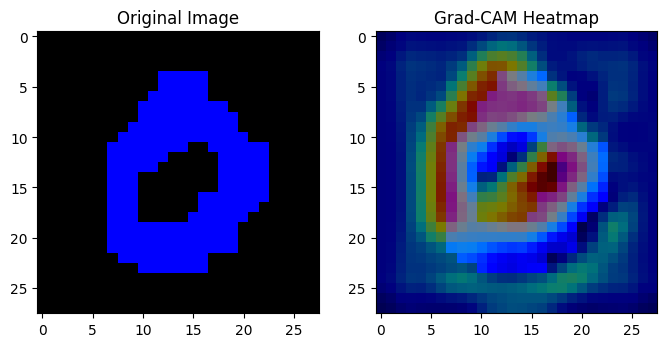

In [ ]:
# 3. Resize heatmap to match the original image size
# INTER_CUBIC makes the 'glow' look smoother
import cv2
heatmapImg = HeatMap.detach().cpu().numpy()
heatmap_resized = cv2.resize(heatmapImg, (28, 28), interpolation=cv2.INTER_CUBIC)
heatmap_resized = (heatmap_resized - heatmap_resized.min()) / (heatmap_resized.max() - heatmap_resized.min() + 1e-8)
# 4. Plotting
plt.figure(figsize=(8, 4))
Img0 = Img0.detach().cpu().numpy()
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(Img0) # This is the numpy img you permuted earlier

# Show Heatmap overlay
plt.subplot(1, 2, 2)
plt.title("Grad-CAM Heatmap")
plt.imshow(Img0) # Background
plt.imshow(heatmap_resized, cmap='jet', alpha=0.5) # Heatmap with 50% transparency
plt.show()

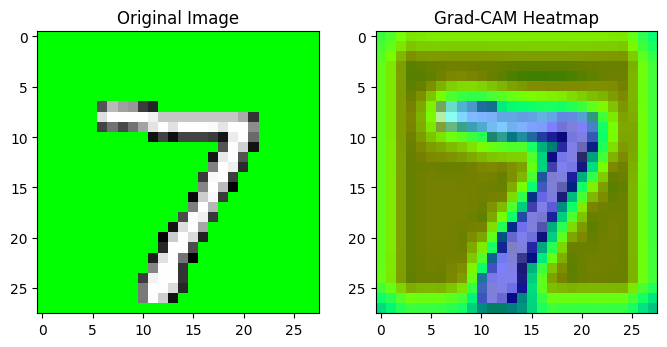

In [ ]:
# 3. Resize heatmap to match the original image size
# INTER_CUBIC makes the 'glow' look smoother
import cv2
heatmapImg = HeatMapBG.detach().cpu().numpy()
heatmap_resized = cv2.resize(heatmapImg, (28, 28), interpolation=cv2.INTER_CUBIC)
heatmap_resized = (heatmap_resized - heatmap_resized.min()) / (heatmap_resized.max() - heatmap_resized.min() + 1e-8)
# 4. Plotting
plt.figure(figsize=(8, 4))
Img0BG = Img0BG.detach().cpu().numpy()
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(Img0BG) # This is the numpy img you permuted earlier

# Show Heatmap overlay
plt.subplot(1, 2, 2)
plt.title("Grad-CAM Heatmap")
plt.imshow(Img0BG) # Background
plt.imshow(heatmap_resized, cmap='jet', alpha=0.5) # Heatmap with 50% transparency
plt.show()